# <font color=white> <span style='background:Brown'> Time series Data

# <font color=white> <span style='background:indigo'> Day2

# <font color=indigo><u>Topics demonstrated </u>
<font color=indigo><b>
1. Smoothing Techniques<br>
2. Forecasting Time Series Data <br>


# <font color=white> <span style='background:indigo'><b> 1. Smoothing techniques

<font color=indigo>Smoothing  is the process of smoothing out the irregular variations in the data to see the clear trend.<br>
Following are some of the important smoothing techniques in time series:<br>

i. Simple Moving average<br>
ii.Weightage average<br>
iii.Exponential average<br>

# <Font color=indigo>i.Moving Averages<br>
Moving Average method forecasts the future points by using an average of several past points.<br>
Helps in visualizing the forecasts<br>

<font color=indigo>Finding the moving average of a list results in a new list containing averages of certain subsets of the original list. <br>
A specified window size determines the size of each subset.<br> 
Each subset is created by moving the window across the list.<br>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
AirPassenger = pd.read_csv('Data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)

In [3]:
AirPassenger[132:]

,Passengers
Travel date,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


<font color=indigo><b>
In Python Moving average is found using by Calling  pandas.Series.rolling(window_size) <br>

In [ ]:
AirPassenger.rolling(5, center=False).mean()

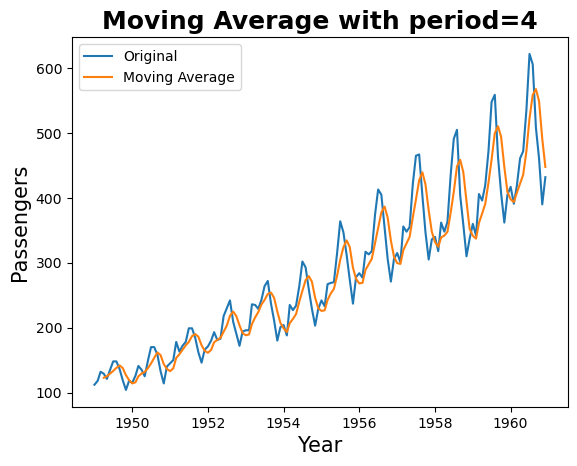

In [6]:
# 4 period moving average

plt.plot(AirPassenger, label='Original')

plt.plot(AirPassenger.rolling(4, center=False).mean(), label='Moving Average')

plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()

<font color=blue>with  period/window size =8

In [ ]:
AirPassenger.rolling(8, center=False).mean()

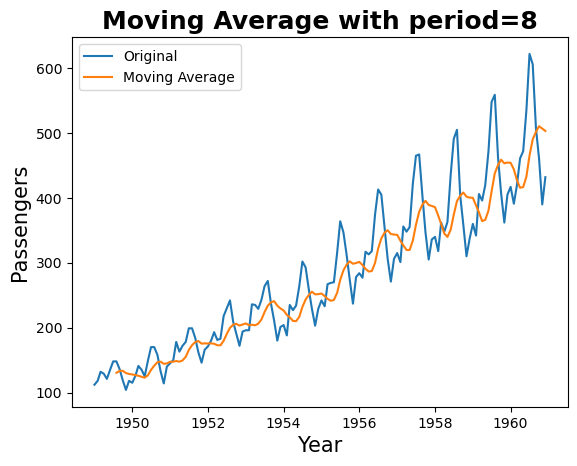

In [7]:
# 4 period moving average
plt.plot(AirPassenger, label='Original')
plt.plot(AirPassenger.rolling(8, center=False).mean(), label='Moving Average')

plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()

# <Font color=indigo>2.Centered  Averages<br>

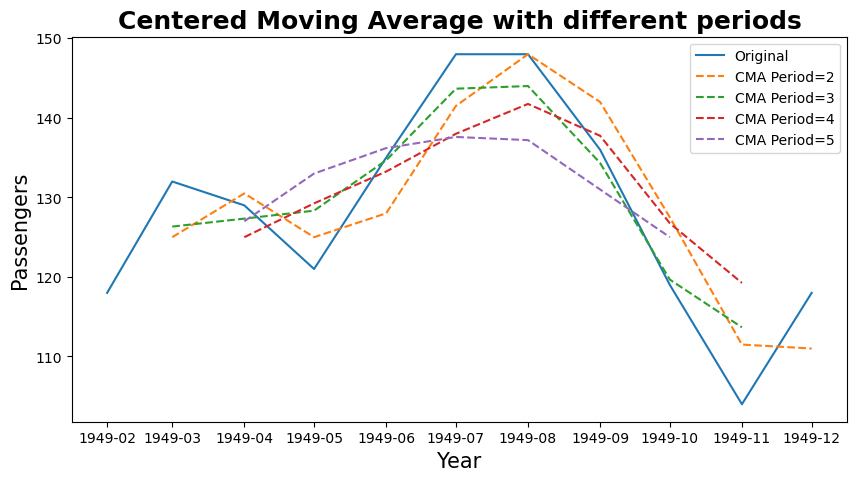

In [8]:
# Centered Moving Averages
plt.figure(figsize=(10, 5))

plt.plot(AirPassenger.iloc[1:12], label='Original')

plt.plot(AirPassenger.iloc[1:12].rolling(2, center=True).mean(), '--', label='CMA Period=2')

plt.plot(AirPassenger.iloc[1:12].rolling(3, center=True).mean(), '--', label='CMA Period=3')

plt.plot(AirPassenger.iloc[1:12].rolling(4, center=True).mean(), '--', label='CMA Period=4')

plt.plot(AirPassenger.iloc[1:12].rolling(5, center=True).mean(), '--', label='CMA Period=5')

plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Centered Moving Average with different periods', weight='bold', fontsize=18)
plt.show()

# <font color=indigo> <b>3.Exponential Smoothing

Here in this example, we have set alpha to 0.2. Exponential smoothing for March takes the estimated value of March (113.2) and the observed value of March (132). The exponentially smoothed value for December 1949 is 123.40; this value is considered as the forecasted value for January 1950.

<font color=indigo><b>ewm () <br></b>

purpose:Provides exponential weighted functions.<br>
parameetrs:<br>
alpha : Specify smoothing factor (float)<br>
adjust : bool, default True<br>
Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings<br>

In [9]:
# Exponential smoothing is calculated and rounded off to 2 decimal values
# Importing libraries
import numpy as np

# Exponential smoothing is calculated and rounded off to 2 decimal values
np.round(AirPassenger.ewm(alpha=0.2,adjust=False).mean(),2)

AirPassenger[0:11]

,Passengers
Travel date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In this example, we set alpha=0.2. Let us understand how to estimate the optimal value of alpha.

#### Estimation of the Smoothing Constant

In unforeseen situations such as natural calamities and economy crashes, there may be a sudden shift in the observed data.

>By setting alpha to a larger value we give more weight to the existing observations and less weight to the forecasted values. 

>If we set alpha to a lower value, more weight is given to the recent forecasted value.

>If there is a sudden change in the series i.e. if y(t) observed to be very high or low, then this change will not be captured in the smoothing. The accuracy of the forecast depends on choosing a proper value of alpha.

>Let's estimate alpha value which can help us predict the number of people who will take the flight in January 1960.

We compare the forecasted values and the observed values for different values of alpha. The value of alpha that gives us the minimum forecasted error, is then chosen. Estimation of alpha is done on the basis of minimum MSE (Mean Square Error) as given below.



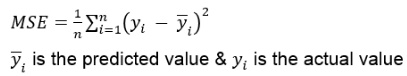

In [10]:
# Setting frequency

AirPassenger = pd.read_csv('Data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)

AirPassenger = AirPassenger.resample('M').mean()

AirPassenger.head()

,Passengers
Travel date,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


<font color=indigo>Simple exponential smoothing and forecasting

In [11]:
# Simple exponential smoothing
# Finding alpha value for the forecasted value and mean squared error

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from sklearn.metrics import mean_squared_error

import scipy as sp
for i in range(1, 11):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=i/10, optimized=False)
    
    forecasted_val = np.round(model.forecast(1)[0], 2)
    
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2))

alpha =  0.1 | Forecasted value:  416.61 | MSE:  134.79
alpha =  0.2 | Forecasted value:  431.22 | MSE:  687.49
alpha =  0.3 | Forecasted value:  428.98 | MSE:  575.04
alpha =  0.4 | Forecasted value:  419.08 | MSE:  198.25
alpha =  0.5 | Forecasted value:  406.36 | MSE:  1.85
alpha =  0.6 | Forecasted value:  393.78 | MSE:  125.89
alpha =  0.7 | Forecasted value:  382.81 | MSE:  492.4
alpha =  0.8 | Forecasted value:  373.96 | MSE:  963.48
alpha =  0.9 | Forecasted value:  367.15 | MSE:  1432.62
alpha =  1.0 | Forecasted value:  362.0 | MSE:  1849.0


In [12]:
# Function to find optimum value of alpha

def optimum_alpha(x):
    
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    
    mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    
    return mse

optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)


if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result    

alpha:  1.0 MSE:  1849.0
alpha:  1.05 MSE:  2035.81
alpha:  0.95 MSE:  1648.36
alpha:  0.9 MSE:  1432.62
alpha:  0.8 MSE:  963.48
alpha:  0.7 MSE:  492.4
alpha:  0.5 MSE:  1.85
alpha:  0.3 MSE:  575.04
alpha:  0.3 MSE:  575.04
alpha:  0.6 MSE:  125.89
alpha:  0.4 MSE:  198.25
alpha:  0.55 MSE:  25.7
alpha:  0.45 MSE:  61.62
alpha:  0.525 MSE:  3.5
alpha:  0.475 MSE:  21.25
alpha:  0.5125 MSE:  0.07
alpha:  0.525 MSE:  3.5
alpha:  0.50625 MSE:  0.3
alpha:  0.51875 MSE:  1.14
alpha:  0.50937 MSE:  0.02
alpha:  0.50625 MSE:  0.3
alpha:  0.51094 MSE:  0.0
alpha:  0.5125 MSE:  0.07
alpha:  0.51016 MSE:  0.0
alpha:  0.51172 MSE:  0.03
alpha:  0.51055 MSE:  0.0
alpha:  0.51055 MSE:  0.0
alpha:  0.51133 MSE:  0.01
alpha:  0.51074 MSE:  0.0
alpha:  0.51074 MSE:  0.0
alpha:  0.51113 MSE:  0.01
alpha:  0.51084 MSE:  0.0
alpha:  0.51084 MSE:  0.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 33


array([0.5109375])

In [13]:
# Creating model using optimum alpha value

model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=optimum_alpha_result, optimized = False)
forecasted_val = np.round(model.forecast(1)[0], 2)

mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)

print('Alpha: ', optimum_alpha_result[0], 
      '\nActual value: ', AirPassenger.iloc[131][0], 
      '\nForecasted value: ', np.round(forecasted_val).astype(int),
      '\nMean Squared Error: ', mse)

Alpha:  0.5109374999999995 
Actual value:  405.0 
Forecasted value:  405 
Mean Squared Error:  0.0


In [14]:
AirPassenger.iloc[131]

Passengers    405.0
Name: 1959-12-31 00:00:00, dtype: float64

In [15]:
# Forecasting values for next year
forecasted_data=np.round(model.forecast(12)).astype(int)

forecasted_data

1959-12-31    405
1960-01-31    405
1960-02-29    405
1960-03-31    405
1960-04-30    405
1960-05-31    405
1960-06-30    405
1960-07-31    405
1960-08-31    405
1960-09-30    405
1960-10-31    405
1960-11-30    405
Freq: M, dtype: int32

The output gives the point forecast. Below figure shows the short term prediction by using simple exponential smoothing.

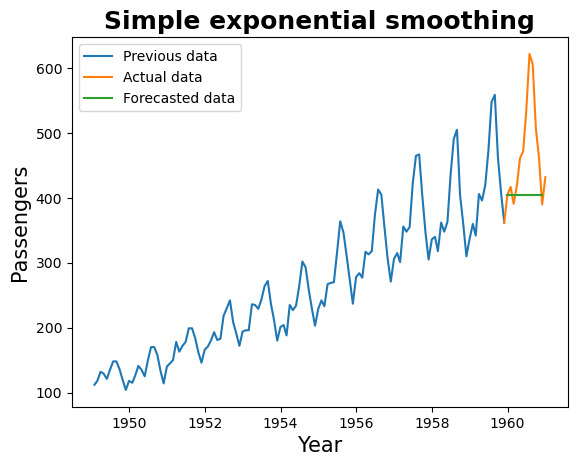

In [16]:
# Importing libraries
import matplotlib.pyplot as plt
# Visualizing the forecasted value

plt.plot(AirPassenger.iloc[:131], label='Previous data')

plt.plot(AirPassenger.iloc[130:], label='Actual data')

plt.plot(forecasted_data, label='Forecasted data')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Simple exponential smoothing', weight='bold', fontsize=18)
plt.legend()
plt.show()


In [18]:
#forecasted_data

# <font color=indigo><b> Stationary Time Series
<font color=indigo><b>Pandas dataframe.diff() is used to implement the differencing<br>
Pandas dataframe.diff() is used to find the first discrete difference of objects over the given axis.<br>
Syntax: DataFrame.diff(periods=1, axis=0)<br>

Parameters:<br>
periods : Periods to shift for forming difference<br>
axis : Take difference over rows (0) or columns (1).<br>
Returns: diffed : DataFrame    <br>
   

In [19]:
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Taking year 1949 data
st = pd.DataFrame(AirPassenger.iloc[:12].T.values[0], columns=['Year 1949'], index=cols)

# Lag 1
st['lag1'] = AirPassenger.iloc[:12].diff(1).T.values[0]

# Lag 2
st['lag2'] = AirPassenger.iloc[:12].diff(2).T.values[0]

# Difference with order 1
st['diffOrd1'] = np.concatenate(([np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 1)))

# Difference with order 2
st['diffOrd2'] = np.concatenate(([np.nan, np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 2)))
st

,Year 1949,lag1,lag2,diffOrd1,diffOrd2
Jan,112.0,NaN,NaN,NaN,NaN
Feb,118.0,6.0,NaN,6.0,NaN
Mar,132.0,14.0,20.0,14.0,8.0
Apr,129.0,-3.0,11.0,-3.0,-17.0
May,121.0,-8.0,-11.0,-8.0,-5.0
Jun,135.0,14.0,6.0,14.0,22.0
Jul,148.0,13.0,27.0,13.0,-1.0
Aug,148.0,0.0,13.0,0.0,-13.0
Sep,136.0,-12.0,-12.0,-12.0,-12.0
Oct,119.0,-17.0,-29.0,-17.0,-5.0


<font color=blues> For details about spines usage in graph please visit the website:https://matplotlib.org/3.1.1/gallery/ticks_and_spines/spines.html

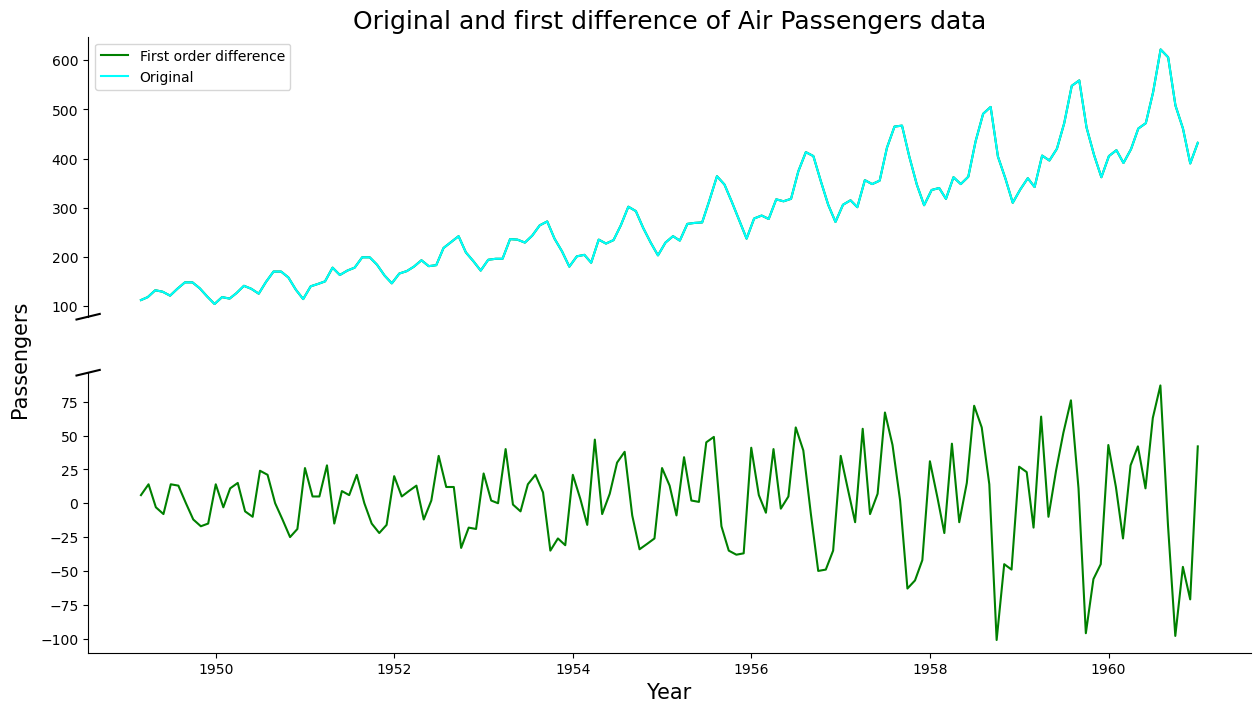

In [24]:
# First order difference values
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(AirPassenger.T.values[0], 1))), index=AirPassenger.index)
plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))

# Dummy plot, used to create legend label for second plot
ax1.plot(AirPassenger, label="First order difference", c='g') 
ax1.plot(AirPassenger, label='Original', c='cyan')
ax1.set_title('Original and first difference of Air Passengers data', fontsize=18)

# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()

# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 

# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()

In [ ]:
# Log Differencing

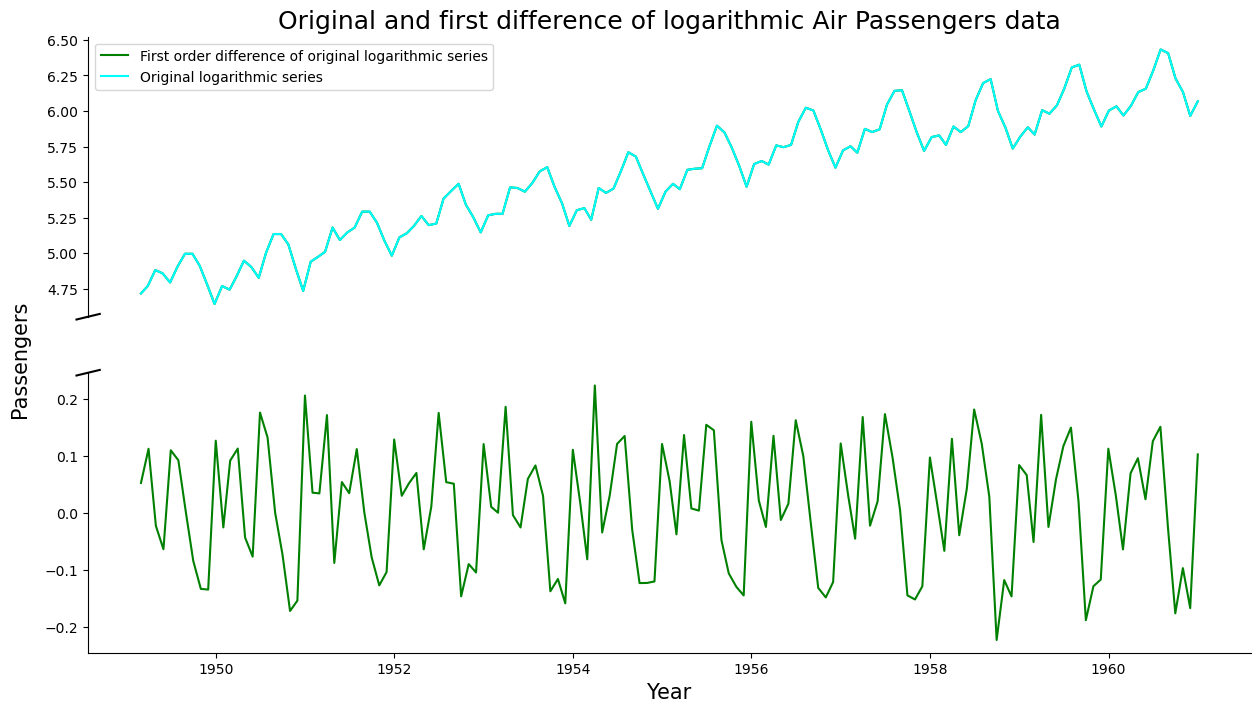

In [23]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# First order difference values of logarithmic series
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(np.log(AirPassenger).T.values[0], 1))), index=AirPassenger.index)
plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
# Dummy plot, used to create legend label for second plot
ax1.plot(np.log(AirPassenger), label="First order difference of original logarithmic series", c='g') 
ax1.plot(np.log(AirPassenger), label='Original logarithmic series', c='cyan')
ax1.set_title('Original and first difference of logarithmic Air Passengers data', fontsize=18)
# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()
# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 
# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()


### The plot of the series helps us to draw some conclusions, whether a particular series is stationary or not. We may also use Dickey-Fuller test to check the stationarity of a series.

# <font color=indigo><b>2.Augmented Dickey-Fuller test : Stationarity test

<font color=Indigo><b>
A formal and robust way of testing the stationarity of the time series data is by using Dickey- Fuller test.<br>
ADF test uses t-statistics for testing the presence of Unit root .<br>

We can check the stationarity of the series by using the Dickey-Fuller test. It uses hypothesis testing for checking the stationarity of a series as mentioned below. 

> Hnull  : series is non-stationary

> Halt : series is stationary

1. If the p-value calculated is less than 0.05- the null hypothesis is rejected,and the series is assumed to be stationary .

2. If the null hypothesis is not rejected, then the series is assumed to be non-stationary. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary.

In [25]:
# Function for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
hsales = pd.read_csv('hsales.csv', index_col='date', date_parser=dateparse)


def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)

# Passing values as 1D numpy array
dffunc(hsales.T.values[0])

Test Statistic            -2.975732
p-value                    0.037224
Critical Value at 5%      -2.872721
AIC                     1571.446770
dtype: float64

In [26]:
import pandas as pd
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('AirPassengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f p-value: %f' % (result[0], result[1]))

print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369 p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [27]:
# Dickey-Fuller test of first order difference of log transformed Air passengers data
dffunc(np.diff(np.log(AirPassenger).T.values[0], 1))

Test Statistic           -2.717131
p-value                   0.071121
Critical Value at 5%     -2.884398
AIC                    -440.358470
dtype: float64

In [28]:
# Dickey-Fuller test of second order difference of log transformed Air passengers data
dffunc(np.diff(np.log(AirPassenger).T.values[0], 2))

Test Statistic         -8.196629e+00
p-value                 7.419305e-13
Critical Value at 5%   -2.884398e+00
AIC                    -4.308936e+02
dtype: float64

# <font color=indigo><b> Seasonal indexing

In [31]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
AirPassenger = pd.read_csv('Data/AirPassengers.csv', index_col='Travel date', date_parser=dateparse)

In [33]:
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#reshape the dataframe based in # Month  and # Year
AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12),columns=cols, index=range(1949, 1961))             
AP_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [34]:
# Excluding year 1960
AP = AP_reshaped.iloc[:11, :].copy()

#1 Finding average yearly

AP_yearly_mean = AP.mean(axis=1)
AP_yearly_mean

1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
dtype: float64

In [35]:
#2 Dividing with mean values

AP_month_avg = AP.div(AP_yearly_mean.values, axis=0)
AP_month_avg

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,0.884211,0.931579,1.042105,1.018421,0.955263,1.065789,1.168421,1.168421,1.073684,0.939474,0.821053,0.931579
1950,0.823389,0.902148,1.009547,0.966587,0.894988,1.066826,1.217184,1.217184,1.131265,0.952267,0.816229,1.002387
1951,0.852106,0.881489,1.046033,0.957884,1.010774,1.046033,1.169442,1.169442,1.081293,0.952008,0.857982,0.975514
1952,0.868020,0.913706,0.979695,0.918782,0.928934,1.106599,1.167513,1.228426,1.060914,0.969543,0.873096,0.984772
1953,0.871111,0.871111,1.048889,1.044444,1.017778,1.080000,1.173333,1.208889,1.053333,0.937778,0.800000,0.893333
1954,0.853854,0.786885,0.983607,0.950122,0.979421,1.104988,1.264039,1.226369,1.084060,0.958493,0.849669,0.958493
1955,0.852113,0.820423,0.940141,0.947183,0.950704,1.109155,1.281690,1.221831,1.098592,0.964789,0.834507,0.978873
1956,0.865194,0.843869,0.965727,0.953542,0.968774,1.139375,1.258187,1.233816,1.081493,0.932216,0.825590,0.932216
1957,0.855010,0.817010,0.966297,0.944583,0.963583,1.145442,1.262158,1.267587,1.096584,0.941868,0.827867,0.912011
1958,0.892388,0.834646,0.950131,0.913386,0.952756,1.141732,1.288714,1.325459,1.060367,0.942257,0.813648,0.884514


In [36]:
#3 Finding monthly average
AP_SI = AP_month_avg.mean(axis=0)
AP_SI

Jan    0.859806
Feb    0.854664
Mar    0.989094
Apr    0.958132
May    0.963956
Jun    1.100717
Jul    1.230005
Aug    1.233862
Sep    1.082047
Oct    0.949172
Nov    0.833162
Dec    0.945383
dtype: float64

In [37]:
#4 Dividing by seasonal index, assuming multiplicative model

AP_deseasonalized = AP.div(AP_SI)
AP_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,130.261979,138.065893,133.455483,134.637038,125.524362,122.647342,120.324684,119.948587,125.687679,125.372477,124.825719,124.817077
1950,133.751139,147.426293,142.554721,140.899226,129.673928,135.366325,138.210786,137.778782,146.019509,140.122180,136.828192,148.088058
1951,168.642740,175.507491,179.962697,170.122769,178.431324,161.712791,161.787920,161.282221,170.048036,170.675136,175.236105,175.590126
1952,198.882128,210.608989,195.128093,188.909332,189.842630,198.052744,186.991063,196.132148,193.152389,201.228093,206.442535,205.207737
1953,227.958463,229.329788,238.602228,245.269022,237.562636,220.765215,214.633221,220.446051,219.029264,222.299097,216.044513,212.612140
1954,237.262890,219.969389,237.591201,236.919439,242.749593,239.843690,245.527396,237.465783,239.361094,241.263001,243.650201,242.229752
1955,281.458918,272.621636,269.944046,280.754753,280.095684,286.177130,295.933683,281.230808,288.342322,288.672761,284.458609,294.060572
1956,330.307160,324.103834,320.495365,326.677464,329.890472,339.778561,335.770909,328.237686,328.081809,322.386369,325.267017,323.678184
1957,366.361815,352.185032,359.925394,363.206893,368.273955,383.386505,378.047150,378.486418,373.366340,365.581928,366.075426,355.411339
1958,395.438150,372.075881,365.991552,363.206893,376.573086,395.196990,399.185270,409.284028,373.366340,378.224530,372.076662,356.469111


In [38]:
#5 Building Linear Regression model and predicting trend values
from sklearn.linear_model import LinearRegression

# Reading data
AP_1D = pd.DataFrame(AP_deseasonalized.values.reshape(-1, 1), columns=['value'])

model = LinearRegression()
model.fit(np.arange(1, 133).reshape(-1, 1), AP_1D.value.values.reshape(-1, 1) )

pred = pd.DataFrame(model.predict(np.arange(133, 145).reshape(-1, 1)), columns=['Trend values'], index=cols)
#pred['Regression equations'] = pred['Trend values'].apply(lambda x: str(np.round(model.coef_[0][0], 2)) + ' * '+ str(np.round(x, 2)) + ' + ' + str(np.round(model.intercept_[0], 2)))
pred

,Trend values
Jan,430.727157
Feb,433.260150
Mar,435.793142
Apr,438.326135
May,440.859127
Jun,443.392120
Jul,445.925113
Aug,448.458105
Sep,450.991098
Oct,453.524090


In [ ]:
model.coef_, model.intercept_

#Importing libraries
import numpy as np
import pandas as pd
#Reading data
AP_1D = pd.DataFrame(AP_deseasonalized.values.reshape(-1, 1), columns=['value'])
#Building Linear Regression model and predicting trend values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(1, 133).reshape(-1, 1), AP_1D.value.values.reshape(-1, 1) )
pred = pd.DataFrame(model.predict(np.arange(133, 145).reshape(-1, 1)), columns=['Trend values'], index=cols)
pred['Regression equations'] = pred['Trend values'].apply(lambda x: str(np.round(model.coef_[0][0], 2)) + ' * '+ str(np.round(x, 2)) + ' + ' + str(np.round(model.intercept_[0], 2)))
pred


In [39]:
# Creating dataframe with seasonal index, trend values, monthly occupancy, and error in order to compare

out = pd.DataFrame(AP_SI, columns=['Seasonal Index'])
out.index.name = 1960
out['Trend values'] = pred['Trend values']
out['Monthly occupancy'] = np.round(AP_SI * pred['Trend values']).astype(int)
out['Actual']=AP_reshaped.loc[1960]
out['Error'] = AP_reshaped.loc[1960] - AP_SI * pred['Trend values']
out

,Seasonal Index,Trend values,Monthly occupancy,Actual,Error
1960,,,,,
Jan,0.859806,430.727157,370,417,46.658308
Feb,0.854664,433.260150,370,391,20.707986
Mar,0.989094,435.793142,431,419,-12.040324
Apr,0.958132,438.326135,420,461,41.025880
May,0.963956,440.859127,425,472,47.031065
Jun,1.100717,443.392120,488,535,46.950806
Jul,1.230005,445.925113,548,622,73.509746
Aug,1.233862,448.458105,553,606,52.664596
Sep,1.082047,450.991098,488,508,20.006349


In [ ]:
AP_reshaped.loc[1960]

In [ ]:
Estimates=pd.DataFrame(out['Monthly occupancy'].values.reshape(-1,1))

In [ ]:
Estimates.reset_index(drop=True)

In [ ]:
Estimates['index_column'] = AirPassenger[132:].index

In [ ]:
Estimates.reset_index(drop=True)
Estimates['Predictions']=Estimates[0]

In [ ]:
Estimates

In [ ]:
Estimates = Estimates.iloc[:, 1:]

# Rename the 'index_column' as 'Travel dates'
Estimates = Estimates.rename(columns={'index_column': 'Travel dates'})

# Output the updated DataFrame


In [ ]:
Estimates

In [ ]:
series = pd.Series(Estimates['Predictions'].values, index=Estimates['Travel dates'])

In [ ]:
series

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
# Visualizing the forecasted value

plt.plot(AirPassenger.iloc[131:], label='Actual Data')

plt.plot(series.iloc[:], label='Predicted Data')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Seasonal Indexing', weight='bold', fontsize=18)
plt.legend()
plt.show()

The output gives the point forecast. Below figure shows the short term prediction by using simple exponential smoothing.

# <font color=indigo><b>AutoCorrelation

# <font color=Blue><b>i.ACF -AutoCorrelation Function

<font color=indigo>The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF)<br>
The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. <br>
ACF for a time series :yt is given by:<br>
Corr(yt,yt−k) where, k=1,2,...<br>
value of k is the time gap being considered and is called the lag. <br>
lag(1) means sucessive rows are considered

In [ ]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
hsales = pd.read_csv('hsales.csv', index_col='date', date_parser=dateparse)

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot of hsales
plot_acf(hsales, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of hsales data', fontsize=18, weight='bold')
plt.show()



In [ ]:
# ACF plot of log(Airpassengers)
plot_acf(np.log(AirPassenger), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of log Air Passengers data', fontsize=18, weight='bold')
plt.show()

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot of diff2(log(Airpassengers))
plot_acf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of diff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

# <font color=Blue><b>i.PACF - Partial AutoCorrelation Function

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of hsales
plot_pacf(hsales, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.xlim(0.5, 30)
plt.title('Partial Autocorrelation of hsales data', fontsize=18, weight='bold')
plt.show()

# PACF plot of diff2(log(Airpassengers))
plot_pacf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=15)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.xlim(0.5, 15)
plt.title('Partial Autocorrelation of \ndiff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

### Estimating the ARIMA parameters

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Values to keep in training data, k
k = 60

# Model building
model = SARIMAX(np.log(AirPassenger.iloc[:k]), 
                order=(2, 1, 2), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Visualization
plt.figure(figsize=(15, 5))
plt.plot(AirPassenger.iloc[:k], label='Train data')
plt.plot(AirPassenger.iloc[k:], label='Test data')
plt.plot(np.round(np.exp(model_fit.forecast(144-k))), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('SARIMA forecasting', fontsize=18, weight='bold')
plt.show()

In [ ]:
# Importing libraries
import numpy as np

#finding the mean squared error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(AirPassenger.iloc[k:], np.round(np.exp(model_fit.forecast(144-k)))))

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterating over parameters
rmse = []
params = []
for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(3):
                for D in range(2):
                    for Q in range(3):            
                        try:
                            model = SARIMAX(np.log(AirPassenger.iloc[:k]), 
                                            order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 12), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)                            
                            rmse.append(np.sqrt(mean_squared_error(AirPassenger.iloc[k:], 
                                                np.round(np.exp(model_fit.forecast(144-k))))))
                            params.append(((p, d, q), (P, D, Q)))
                        except:
                            pass
                        
# Storing RMSE and parameters and sorting the dataframe based on RMSE in ascending order
res = pd.DataFrame([rmse, params]).T.sort_values([0])
res.columns = ['RMSE', 'Params']
res.head(1)

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# plotting RMSE values across all possible parameter combinations
plt.figure(figsize=(15, 5))
plt.plot(rmse, label='All RMSEs')
plt.scatter(np.arange(210, 211), res.iloc[0, 0], s=70, c='g', label='Chosen RMSE')
plt.legend()
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('RMSE values across all possible parameter combinations', weight='bold', fontsize=18)
plt.show()